In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random

#### Функции 

In [43]:
def const(N):
    return N

def summation(N):
    return sum(N)

def production(N):
    a = 1
    for n in N:
        a*=n
    return a

def polynom_horner(N):
    a = 1
    for i in range(N):
        a = a*1.5 + i
    return a

def polynom(N):
  #  print(N)
    n = np.random.uniform(size=(N,1))
    x = 1.5
    p = 0
    for i in range(len(n)):
        p += n[i]*x**i
    return p

def bubble(array):
    N = len(array)
    for i in range(N-1):
        for j in range(N-i-1):
            if array[j] > array[j+1]:
                buff = array[j]
                array[j] = array[j+1]
                array[j+1] = buff

def qsort(A):
    if len(A) <= 1:
        return A
    else:
        q = random.choice(A)
        L = [elem for elem in A if elem < q]
        M = [q] * A.count(q)
        R = [elem for elem in A if elem > q] 
        return qsort(L) + M + qsort(R)
    
def timsort(N):
    return sorted(N)

def matrix_prod(m1, m2):    
    return m1*m2
    

#### Вспомогательные функции

In [40]:
def draw_times(times, function_name = "text", addition_times = None):
    
    plt.xlabel("count of data")
    plt.ylabel("time")
    plt.title(function_name)
    
    if addition_times is None:
        plt.plot(times)
    else:
        plt.plot(times, label = "real time")
        plt.plot(addition_times, label = "expected time", color = 'r', linewidth=2.3)
        plt.legend()
  #  plt.show()

def draw_fives(fun, theoretical, name):
    plt.figure(figsize = (10,5))
    plt.subplot(2,2,1)
    const_times_1 = np.asarray(fun())
    draw_times(const_times_1, function_name = name+" - v1", addition_times = None)
    plt.subplot(2,2,2)
    const_times_2 = np.asarray(fun())
    draw_times(const_times_2, function_name = name+" - v2", addition_times = None)
    plt.subplot(2,2,3)
    const_times_3 = np.asarray(fun())
    draw_times(const_times_3, function_name = name+" - v3", addition_times = None)
    plt.subplot(2,2,4)
    const_times_4 = np.asarray(fun())
    draw_times(const_times_4, function_name = name+" - v4", addition_times = None)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (10,3))

    const_times_5 = np.asarray(fun())
    mean_value = (const_times_1+const_times_2+ const_times_3+const_times_4+const_times_5)/5
    draw_times(mean_value, function_name = "Mean " + name, addition_times = theoretical)
   # plt.show()
    
    

### Анализ

1.1 Константная функция. Ожидаемая алгоритмическая сложность О(1), так как данные  в цикле не прогоняются. 


In [34]:
def speed_const():
    const_times = []
    for i in range(1,2000):
        a = time.time()
        f = const(i)
        b = time.time()
        const_times.append((b-a))
    return const_times

def theoretical_const():
    return [0]*2000
        
   

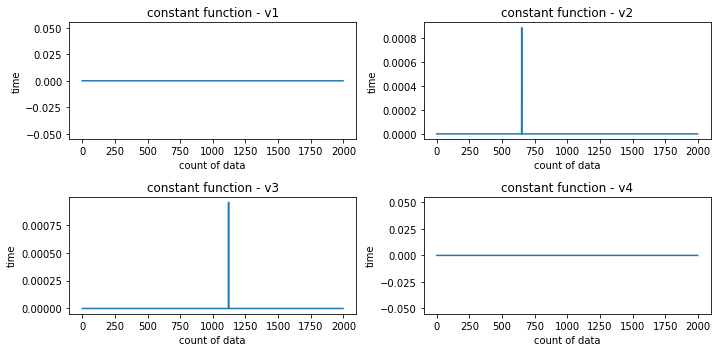

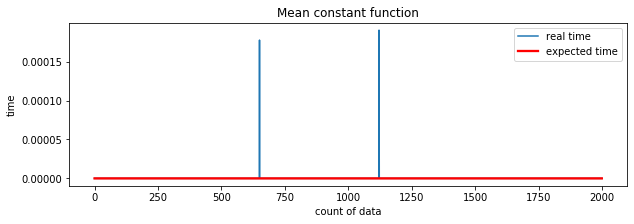

In [29]:
theoretical = theoretical_const()
draw_fives(speed_const, theoretical, name = "constant function")

1.2 Функция суммы. Ожидаемая алгоритмическая сложность О(N): цикл итерируется по массиву чисел 1 раз от начала и до конца.


In [62]:

def speed_sum(N = 5000):
    sum_times = []
    for i in range(1,N):
        data = np.random.randint(0,2000, size = (i))
        a = time.time()   
        f = summation(data)
        b = time.time()
        sum_times.append((b-a))
    return sum_times

def theoretical_sum(first_value = 1, N = 5000):
    times = [i*first_value for i in range(N)]
    return times

4.1e-07


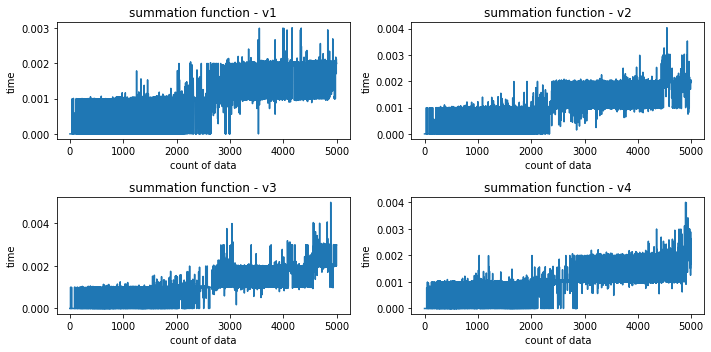

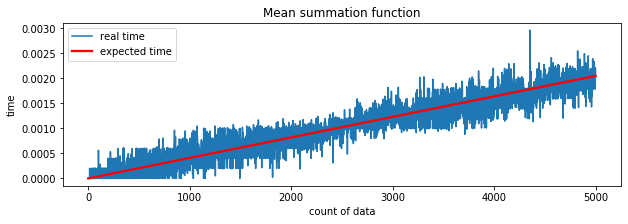

In [90]:
first_value = 0.00000041
print(first_value)
theoretical = theoretical_sum(first_value = first_value)
draw_fives(speed_sum, theoretical, name = "summation function")

1.3 Функция произведения. Ожидаемая алгоритмическая сложность О(N).

In [92]:
def speed_prod():
    prod_times = []
    N = 10000
    for i in range(1,N):
        a = time.time()
        data = np.random.randint(0,2000, size = (i))
        f = production(data)
        b = time.time()
        prod_times.append((b-a))
    return prod_times 
   
def theoretical_prod(first_value = 0.00000041, N = 10000):
    times = [i*first_value for i in range(N)]
    return times

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


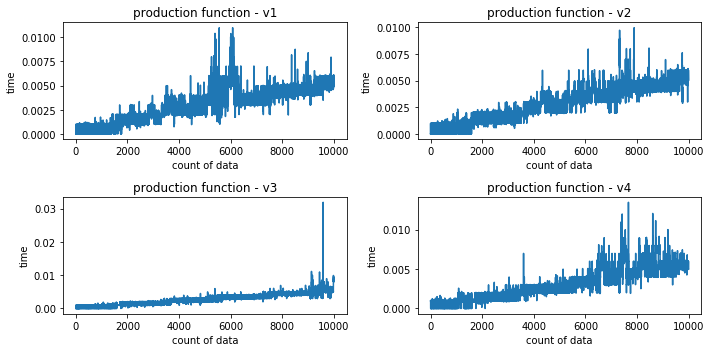

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


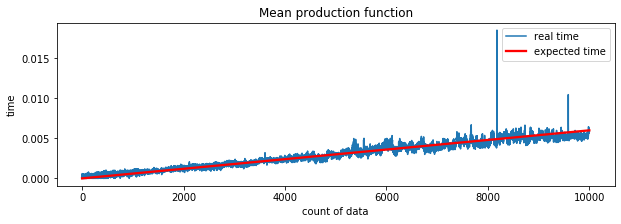

In [94]:
first_value = 0.0000006
theoretical = theoretical_prod(first_value = first_value)
draw_fives(speed_prod, theoretical, name = "production function")

1.4 Функция полином. Ожидаемая алгоритмическая сложность О(N).

In [99]:
def speed_polynom():
    poly_times = []
    N = 1500
    for i in range(1,N):
        a = time.time()
        f = polynom(i)
        b = time.time()
        poly_times.append((b-a))
    return poly_times


def speed_polynom_hor_timeit():
    poly_times = []
    N = 10000
    for i in range(1,N):
        a = time.time()
        f = polynom_horner(i)
        b = time.time()
        poly_times.append((b-a))
    return poly_times
   
def theoretical_poly(first_value, N = 1500):
    times = [(i*first_value) for i in range(N)]
    return times
    
def theoretical_poly_hor(first_value, N = 10000):
    times = [(i*first_value) for i in range(N)]
    return times

2.6e-06


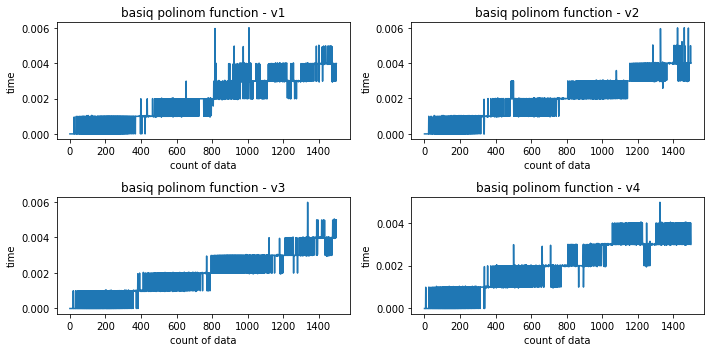

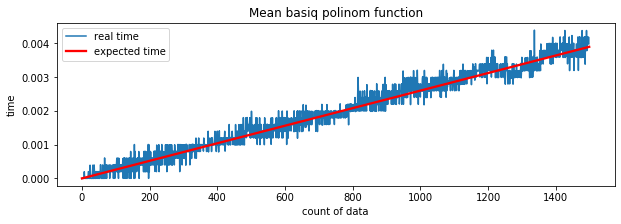

In [97]:
first_value = 0.0000026

print(first_value)
theoretical = theoretical_poly(first_value = first_value)
draw_fives(speed_polynom, theoretical, name = "basiq polinom function")

6e-08


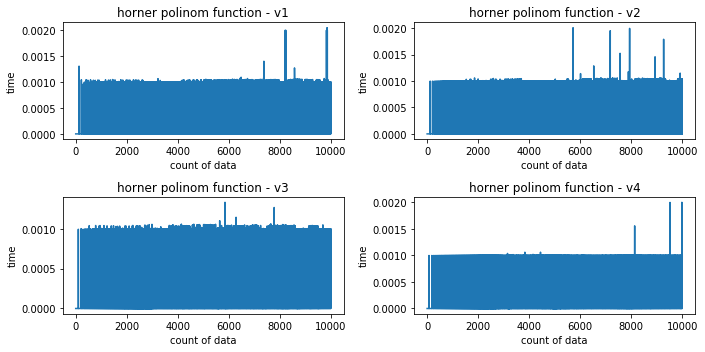

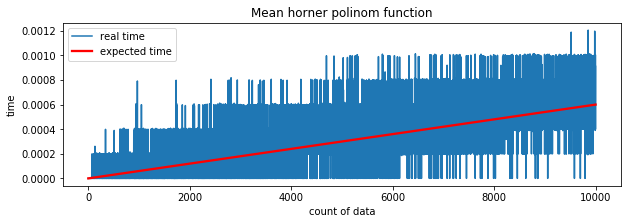

In [100]:
first_value = 0.00000006
print(first_value)
theoretical = theoretical_poly_hor(first_value = first_value)
draw_fives(speed_polynom_hor_timeit, theoretical, name = "horner polinom function")

1.5 Сортировка пузырьком. Ожидаемая сложность O (N^2)

In [83]:
def speed_bubble():
    bubb_times = []
    N = 1000
    for i in range(1,N):
        data = np.random.randint(0,5, size = (i))
        a = time.time()
        bubble(data)
        b = time.time()
        bubb_times.append((b-a))
    return bubb_times
    
def theoretical_bubble(first_value = 0.0000041, N = 1000):
    times = [(i*first_value)**2 for i in range(N)]
    return times   

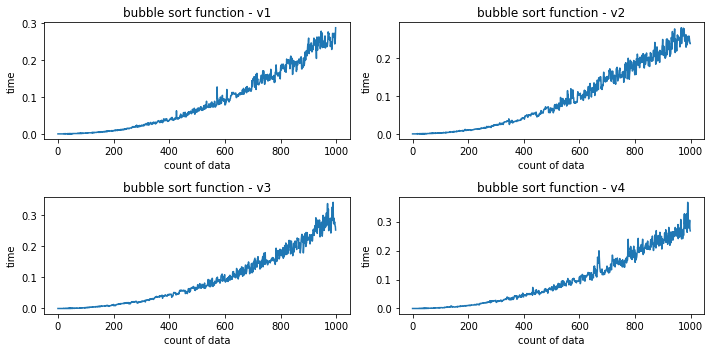

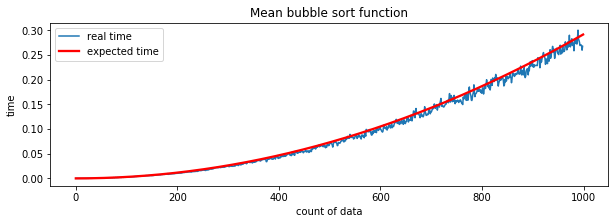

In [101]:
first_value = 0.00054
theoretical = theoretical_bubble(first_value = first_value)
draw_fives(speed_bubble, theoretical, name = "bubble sort function")

1.6 Быстрая сортировка. 

In [131]:
def speed_qsort():
    qsort_times = []
    N = 4000
    for i in range(1,N):
        data = list(np.random.randint(0,2000, size = (i)))
        a = time.time()

        qsort(data)
        b = time.time()
        qsort_times.append((b-a))
    return qsort_times

def theoretical_qsort(first_value = 0.0000041, N = 4000):
    times = [(i*np.log(2*i))*0.00000083 for i in range(N)]
    return times
    

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


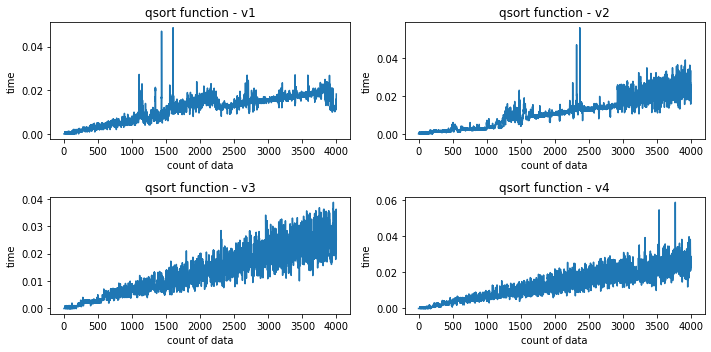

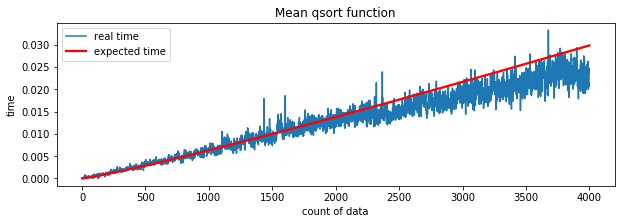

In [132]:
first_value = 0.0004
theoretical = theoretical_qsort(first_value = first_value)
draw_fives(speed_qsort, theoretical, name = "qsort function")

1.7 Тимсорт. 

In [144]:
def speed_timsort():
    timsort_times = []
    N = 6000
    for i in range(1,N):
        data = list(np.random.randint(0,2000, size = (i)))
        a = time.time()
        timsort(data)
        b = time.time()
        timsort_times.append((b-a))
    return timsort_times

def theoretical_timsort(first_value = 0.0000041, N = 6000):
    times = [(i*np.log(i))*0.00000009 for i in range(N)]
    return times
    

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


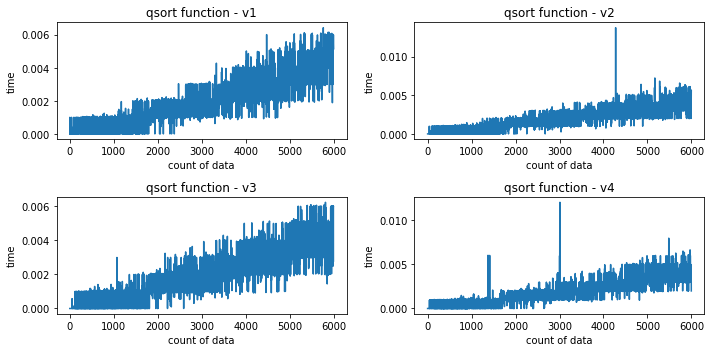

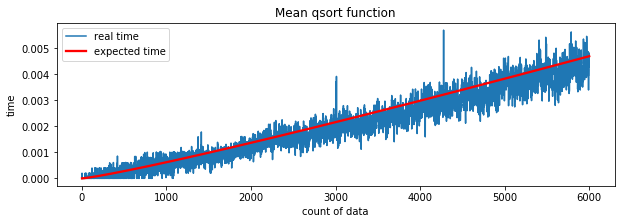

In [145]:
first_value = 0.0004
theoretical = theoretical_timsort(first_value = first_value)
draw_fives(speed_timsort, theoretical, name = "qsort function")

1.8 Перемножение матриц

In [146]:
matrix_times = []
N = 2000
for i in range(1,N):
    m1 = np.matrix(np.random.randint(0,45, size = (i,i)))
    m2 = np.matrix(np.random.randint(0,45, size = (i,i)))
    a = time.time()    
    matrix_prod(m1, m2)
    b = time.time()
    matrix_times.append((b-a))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-146-af1c52fab5aa>", line 7, in <module>
    matrix_prod(m1, m2)
  File "<ipython-input-43-527e2b4ab5e4>", line 51, in matrix_prod
    return m1*m2
  File "C:\Users\mi\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py", line 220, in __mul__
    return N.dot(self, asmatrix(other))
  File "<__array_function__ internals>", line 6, in dot
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most r

KeyboardInterrupt: 

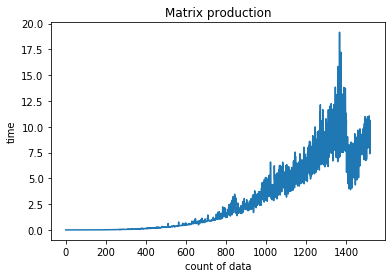

In [147]:
draw_times(matrix_times, function_name = "Matrix production", addition_times = None)